# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
param_1 = "q="
param_2 = "&appid="
param_3 = "&units="
units= "Metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{param_1}{city}{param_2}{weather_api_key}{param_3}{units}"
    print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"] 
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?q=pisco&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 1 of Set 1 | pisco
http://api.openweathermap.org/data/2.5/weather?q=ivanteyevka&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 2 of Set 1 | ivanteyevka
http://api.openweathermap.org/data/2.5/weather?q=grytviken&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 3 of Set 1 | grytviken
http://api.openweathermap.org/data/2.5/weather?q=bilibino&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 4 of Set 1 | bilibino
http://api.openweathermap.org/data/2.5/weather?q=antalaha&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 5 of Set 1 | antalaha
http://api.openweathermap.org/data/2.5/weather?q=tsirang&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 6 of Set 1 | tsirang
http://api.openweathermap.org/data/2.5/w

http://api.openweathermap.org/data/2.5/weather?q=albany&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 6 of Set 2 | albany
http://api.openweathermap.org/data/2.5/weather?q=papatowai&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 7 of Set 2 | papatowai
http://api.openweathermap.org/data/2.5/weather?q=morondava&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 8 of Set 2 | morondava
http://api.openweathermap.org/data/2.5/weather?q=meizhou&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 9 of Set 2 | meizhou
http://api.openweathermap.org/data/2.5/weather?q=edinburgh of the seven seas&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 10 of Set 2 | edinburgh of the seven seas
http://api.openweathermap.org/data/2.5/weather?q=naze&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 11 of Set 2 | naze
http://api.openweathermap.org/data/2.5/weather?q=hermanus&appid=f7f9be

http://api.openweathermap.org/data/2.5/weather?q=la'ie&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 9 of Set 3 | la'ie
http://api.openweathermap.org/data/2.5/weather?q=ribeira grande&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 10 of Set 3 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?q=zvezdnyy&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 11 of Set 3 | zvezdnyy
http://api.openweathermap.org/data/2.5/weather?q=rio grande&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 12 of Set 3 | rio grande
http://api.openweathermap.org/data/2.5/weather?q=weno&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 13 of Set 3 | weno
http://api.openweathermap.org/data/2.5/weather?q=sona&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 14 of Set 3 | sona
http://api.openweathermap.org/data/2.5/weather?q=tupiza&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=

http://api.openweathermap.org/data/2.5/weather?q=fort bragg&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 12 of Set 4 | fort bragg
http://api.openweathermap.org/data/2.5/weather?q=east london&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 13 of Set 4 | east london
http://api.openweathermap.org/data/2.5/weather?q=aripuana&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 14 of Set 4 | aripuana
http://api.openweathermap.org/data/2.5/weather?q=singaparna&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 15 of Set 4 | singaparna
http://api.openweathermap.org/data/2.5/weather?q=axim&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 16 of Set 4 | axim
http://api.openweathermap.org/data/2.5/weather?q=uusikaupunki&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 17 of Set 4 | uusikaupunki
http://api.openweathermap.org/data/2.5/weather?q=miyanoura&appid=f7f9be9bb50a4df

http://api.openweathermap.org/data/2.5/weather?q=kiyawa&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 17 of Set 5 | kiyawa
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=flying fish cove&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 18 of Set 5 | flying fish cove
http://api.openweathermap.org/data/2.5/weather?q=invercargill&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 19 of Set 5 | invercargill
http://api.openweathermap.org/data/2.5/weather?q=lerwick&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 20 of Set 5 | lerwick
http://api.openweathermap.org/data/2.5/weather?q=brampton&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 21 of Set 5 | brampton
http://api.openweathermap.org/data/2.5/weather?q=zheleznogorsk&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 22 of Set 5 | zheleznogorsk
http://api.openweathermap.org/data/2.5

http://api.openweathermap.org/data/2.5/weather?q=arraial do cabo&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 20 of Set 6 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?q=tolanaro&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 21 of Set 6 | tolanaro
http://api.openweathermap.org/data/2.5/weather?q=akhtubinsk&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 22 of Set 6 | akhtubinsk
http://api.openweathermap.org/data/2.5/weather?q=ampasimanolotra&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 23 of Set 6 | ampasimanolotra
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=timbuktu&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 24 of Set 6 | timbuktu
http://api.openweathermap.org/data/2.5/weather?q=hithadhoo&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 25 of Set 6 | hithadhoo
http://api.openweathermap.org/da

http://api.openweathermap.org/data/2.5/weather?q=olinda&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 24 of Set 7 | olinda
http://api.openweathermap.org/data/2.5/weather?q=vadso&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 25 of Set 7 | vadso
http://api.openweathermap.org/data/2.5/weather?q=salalah&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 26 of Set 7 | salalah
http://api.openweathermap.org/data/2.5/weather?q=lata&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 27 of Set 7 | lata
http://api.openweathermap.org/data/2.5/weather?q=port macquarie&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 28 of Set 7 | port macquarie
http://api.openweathermap.org/data/2.5/weather?q=bandar lampung&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 29 of Set 7 | bandar lampung
http://api.openweathermap.org/data/2.5/weather?q=al mindak&appid=f7f9be9bb50a4dff1147ec01a

http://api.openweathermap.org/data/2.5/weather?q=cooma&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 28 of Set 8 | cooma
http://api.openweathermap.org/data/2.5/weather?q=melekeok village&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 29 of Set 8 | melekeok village
http://api.openweathermap.org/data/2.5/weather?q=castillos&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 30 of Set 8 | castillos
http://api.openweathermap.org/data/2.5/weather?q=isangel&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 31 of Set 8 | isangel
http://api.openweathermap.org/data/2.5/weather?q=big bend&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 32 of Set 8 | big bend
http://api.openweathermap.org/data/2.5/weather?q=sangkhla buri&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 33 of Set 8 | sangkhla buri
http://api.openweathermap.org/data/2.5/weather?q=saint-joseph&appid=f7f9be

http://api.openweathermap.org/data/2.5/weather?q=palmer&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 32 of Set 9 | palmer
http://api.openweathermap.org/data/2.5/weather?q=kirensk&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 33 of Set 9 | kirensk
http://api.openweathermap.org/data/2.5/weather?q=seririt&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 34 of Set 9 | seririt
http://api.openweathermap.org/data/2.5/weather?q=hamilton&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 35 of Set 9 | hamilton
http://api.openweathermap.org/data/2.5/weather?q=ramnagar&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 36 of Set 9 | ramnagar
http://api.openweathermap.org/data/2.5/weather?q=douentza&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 37 of Set 9 | douentza
http://api.openweathermap.org/data/2.5/weather?q=wellston&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units

http://api.openweathermap.org/data/2.5/weather?q=canutama&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 36 of Set 10 | canutama
http://api.openweathermap.org/data/2.5/weather?q=timmins&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 37 of Set 10 | timmins
http://api.openweathermap.org/data/2.5/weather?q=borogontsy&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 38 of Set 10 | borogontsy
http://api.openweathermap.org/data/2.5/weather?q=tralee&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 39 of Set 10 | tralee
http://api.openweathermap.org/data/2.5/weather?q=firmat&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 40 of Set 10 | firmat
http://api.openweathermap.org/data/2.5/weather?q=pangody&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 41 of Set 10 | pangody
http://api.openweathermap.org/data/2.5/weather?q=aldan&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&un

http://api.openweathermap.org/data/2.5/weather?q=alatyr'&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 39 of Set 11 | alatyr'
http://api.openweathermap.org/data/2.5/weather?q=center&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 40 of Set 11 | center
http://api.openweathermap.org/data/2.5/weather?q=freetown&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 41 of Set 11 | freetown
http://api.openweathermap.org/data/2.5/weather?q=nova sintra&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 42 of Set 11 | nova sintra
http://api.openweathermap.org/data/2.5/weather?q=xining&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 43 of Set 11 | xining
http://api.openweathermap.org/data/2.5/weather?q=imbituba&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 44 of Set 11 | imbituba
http://api.openweathermap.org/data/2.5/weather?q=enshi&appid=f7f9be9bb50a4dff1147ec01ae1b62b

http://api.openweathermap.org/data/2.5/weather?q=mukah&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 43 of Set 12 | mukah
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=nyurba&appid=f7f9be9bb50a4dff1147ec01ae1b62bd&units=Metric
Processing Record 44 of Set 12 | nyurba
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pisco,-13.7000,-76.2167,22.03,83,0,3.09,PE,1682302355
1,ivanteyevka,55.9711,37.9208,10.11,57,14,0.45,RU,1682302355
2,grytviken,-54.2811,-36.5092,2.37,88,100,7.89,GS,1682302355
3,bilibino,68.0546,166.4372,0.87,73,1,2.51,RU,1682302356
4,antalaha,-14.9003,50.2788,23.20,92,71,1.82,MG,1682302356


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pisco,-13.7000,-76.2167,22.03,83,0,3.09,PE,1682302355
1,ivanteyevka,55.9711,37.9208,10.11,57,14,0.45,RU,1682302355
2,grytviken,-54.2811,-36.5092,2.37,88,100,7.89,GS,1682302355
3,bilibino,68.0546,166.4372,0.87,73,1,2.51,RU,1682302356
4,antalaha,-14.9003,50.2788,23.20,92,71,1.82,MG,1682302356


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

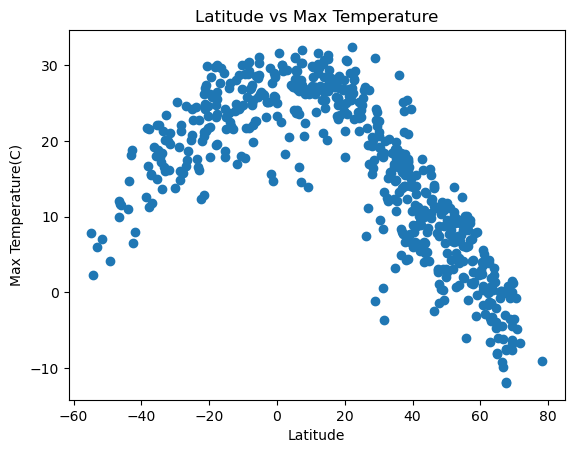

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])
# Incorporate the other graph properties
plt.title("Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

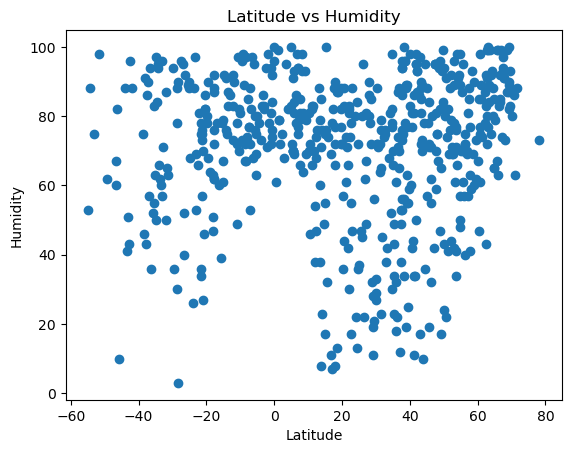

In [20]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])
# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

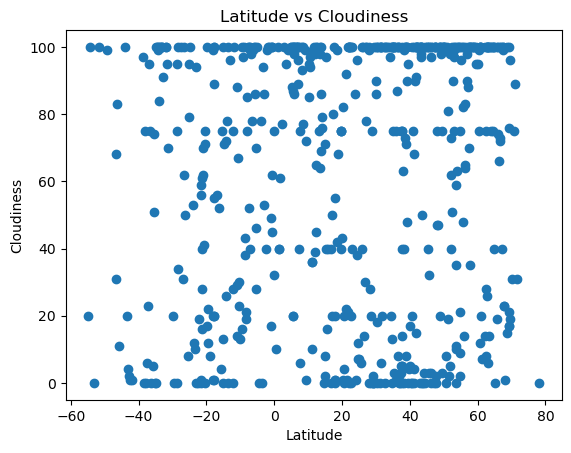

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])
# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

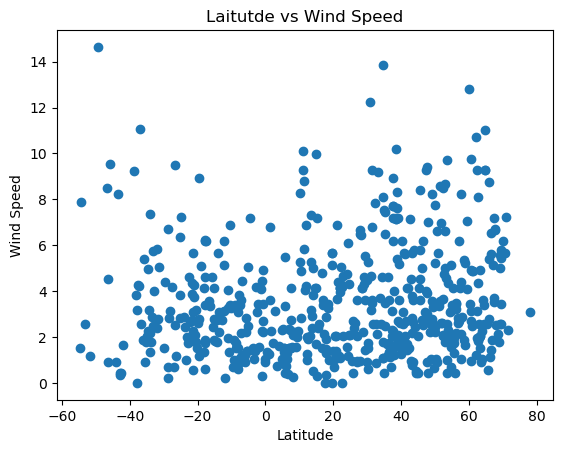

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("Laitutde vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,xlabel,ylabel,title,text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    plt.annotate(f"y={round(slope,2)}x +{round(intercept,2)}",text_coordinates, fontsize=10,color="red")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,color="red")
    print(f"The rvalue is : {rvalue}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ivanteyevka,55.9711,37.9208,10.11,57,14,0.45,RU,1682302355
3,bilibino,68.0546,166.4372,0.87,73,1,2.51,RU,1682302356
5,tsirang,27.0219,90.1229,16.91,67,78,0.91,BT,1682302356
7,rongelap,11.1635,166.8941,27.08,83,36,10.09,MH,1682302356
8,vorkuta,67.5000,64.0000,-11.84,93,100,3.51,RU,1682302356


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<=0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pisco,-13.7000,-76.2167,22.03,83,0,3.09,PE,1682302355
2,grytviken,-54.2811,-36.5092,2.37,88,100,7.89,GS,1682302355
4,antalaha,-14.9003,50.2788,23.20,92,71,1.82,MG,1682302356
6,puerto ayora,-0.7393,-90.3518,25.86,92,45,2.24,EC,1682302356
13,sao francisco do sul,-26.2433,-48.6381,18.62,92,50,1.16,BR,1682302357


###  Temperature vs. Latitude Linear Regression Plot

The rvalue is : -0.8974755953433028


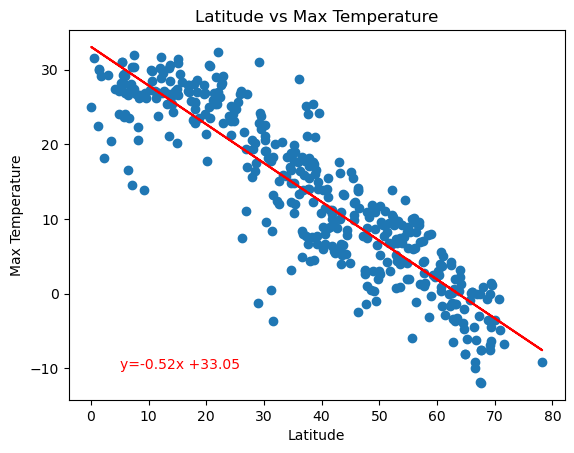

In [45]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
xlabel = "Latitude"
ylabel = "Max Temperature"
title = "Latitude vs Max Temperature"
text_coordinates = (5,-10)
plot_linear_regression(x_values,y_values,xlabel,ylabel,title,text_coordinates)

The rvalue is : 0.7497462036833735


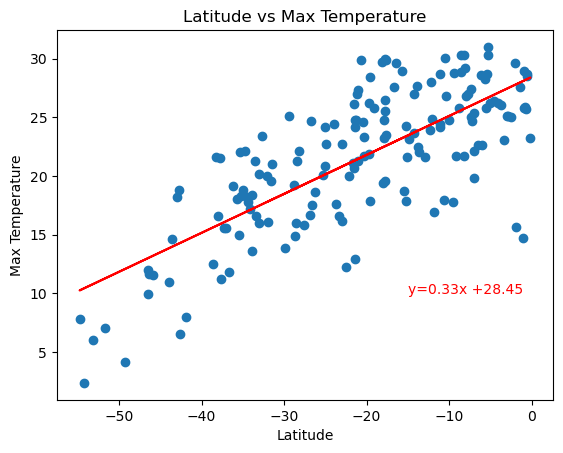

In [49]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
xlabel = "Latitude"
ylabel = "Max Temperature"
title = "Latitude vs Max Temperature"
text_coordinates = (-15,10)
plot_linear_regression(x_values,y_values,xlabel,ylabel,title,text_coordinates)

**Discussion about the linear relationship:** Both graphs show a good correlation between latitude and temperature, as the rvalue was close to 1 on both. For northern hemisphere, as latitude goes up, temperature goes down. For southern hemisphere, as latitude goes up,temperature goes up.

### Humidity vs. Latitude Linear Regression Plot

The rvalue is : 0.15199765869866752


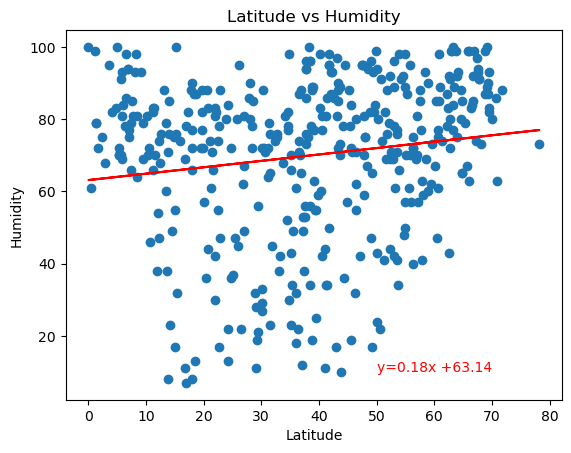

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
xlabel = "Latitude"
ylabel = "Humidity"
title = "Latitude vs Humidity"
text_coordinates = (50,10)
plot_linear_regression(x_values,y_values,xlabel,ylabel,title,text_coordinates)

The rvalue is : 0.23560425718145983


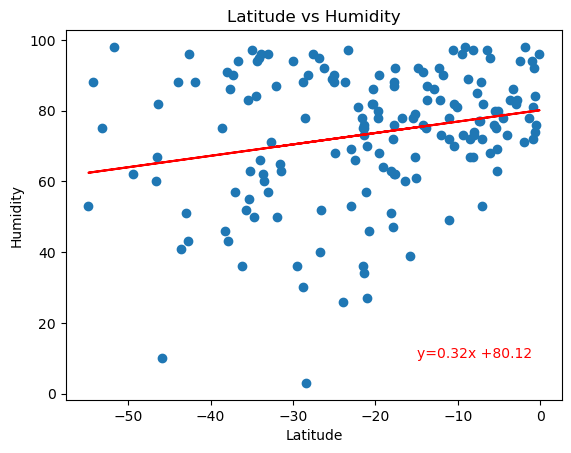

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
xlabel = "Latitude"
ylabel = "Humidity"
title = "Latitude vs Humidity"
text_coordinates = (-15,10)
plot_linear_regression(x_values,y_values,xlabel,ylabel,title,text_coordinates)

**Discussion about the linear relationship:** the correlation between latitude and humidity is not good. This is due to the rvalue not being close to 1.

### Cloudiness vs. Latitude Linear Regression Plot

The rvalue is : 0.018044223104105635


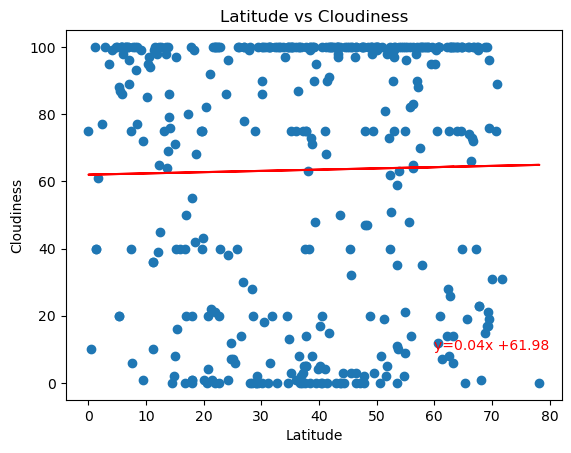

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
xlabel = "Latitude"
ylabel = "Cloudiness"
title = "Latitude vs Cloudiness"
text_coordinates = (60,10)
plot_linear_regression(x_values,y_values,xlabel,ylabel,title,text_coordinates)

The rvalue is : 0.1023786520470567


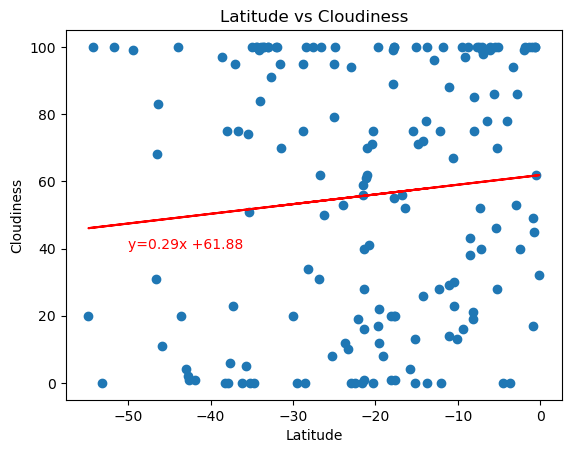

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
xlabel = "Latitude"
ylabel = "Cloudiness"
title = "Latitude vs Cloudiness"
text_coordinates = (-50,40)
plot_linear_regression(x_values,y_values,xlabel,ylabel,title,text_coordinates)

**Discussion about the linear relationship:** There is no linear relationship between latitude and cloudiness. This is due to rvalue being very low. 

### Wind Speed vs. Latitude Linear Regression Plot

The rvalue is : 0.16876195491653764


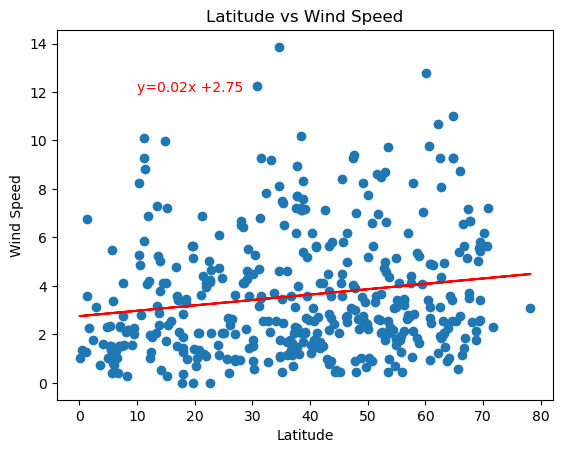

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
xlabel = "Latitude"
ylabel = "Wind Speed"
title = "Latitude vs Wind Speed"
text_coordinates = (10,12)
plot_linear_regression(x_values,y_values,xlabel,ylabel,title,text_coordinates)

The rvalue is : -0.22586155988030743


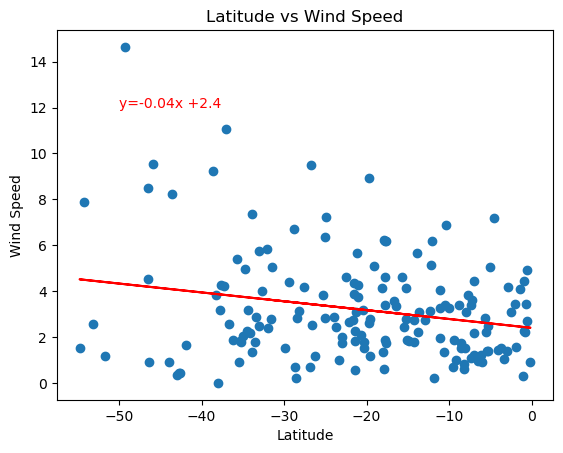

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
xlabel = "Latitude"
ylabel = "Wind Speed"
title = "Latitude vs Wind Speed"
text_coordinates = (-50,12)
plot_linear_regression(x_values,y_values,xlabel,ylabel,title,text_coordinates)

**Discussion about the linear relationship:** There is no linear relationship between latitude and wind speed. This is due to the rvalue being close to 0.